# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [0]:
# TODO: show visualization

In [0]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import permutation_test_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from google.colab import files

In [0]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.width', 150)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# cd gdrive/My\ Drive/
# cd house-prices-advanced-regression-techniques/
cd gdrive/My Drive/house-prices-advanced-regression-techniques

/content/gdrive/My Drive/house-prices-advanced-regression-techniques


In [0]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
df = train_raw.copy()

In [0]:
train_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
## SEPERATE Id AND DROP THE COLUMN IN TEST AND TRAIN

Id_train = train_raw['Id']
Id_test = test_raw['Id']
train_raw.drop("Id", axis = 1, inplace = True)
test_raw.drop("Id", axis = 1, inplace = True)

In [0]:
## IMPUTING VALUES FOR TRAIN DATA
# For numerical value imputation
for i in train_raw.columns:
  if train_raw[i].dtypes == 'int64' or train_raw[i].dtypes == 'float64':
    train_raw[i].fillna(train_raw[i].mean(), inplace=True)

# For categorical value imputation
for i in train_raw.columns:
  if train_raw[i].dtypes == 'object' or train_raw[i].dtypes == 'O':
    train_raw[i].fillna(train_raw[i].mode()[0], inplace=True)

In [0]:
## IMPUTING VALUES FOR TEST DATA
# For numerical value imputation
for i in test_raw.columns:
  if test_raw[i].dtypes == 'int64' or test_raw[i].dtypes == 'float64':
    test_raw[i].fillna(test_raw[i].mean(), inplace=True)

# For categorical value imputation
for i in test_raw.columns:
  if test_raw[i].dtypes == 'object' or test_raw[i].dtypes == 'O':
    test_raw[i].fillna(test_raw[i].mode()[0], inplace=True)

In [0]:
# ENCODING ALL STRING VALUES TO NUMERIC IN TRAIN
for cols in train_raw.columns:
  enc = LabelEncoder()
  if train_raw[cols].dtypes=='object':
    enc.fit(train_raw[cols])
    train_raw[cols] = enc.transform(train_raw[cols])

# ENCODING ALL STRING VALUES TO NUMERIC IN TEST
for cols in test_raw.columns:
  enc = LabelEncoder()
  if test_raw[cols].dtypes=='object':
    enc.fit(test_raw[cols])
    test_raw[cols] = enc.transform(test_raw[cols])

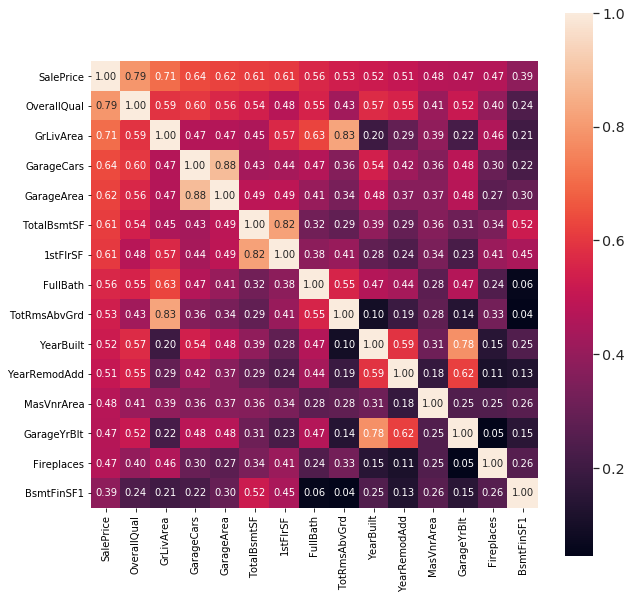

In [0]:
## CORRELATIONS AND HEATMAPS
# 1. Finding features that are highly correlated with 'SalePrice'

count = 15
heatmap_matrix = train_raw.corr()
top_cor_cols = heatmap_matrix.nlargest(count, 'SalePrice')['SalePrice'].index
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.3)
cm = np.corrcoef(train_raw[top_cor_cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=top_cor_cols.values, xticklabels=top_cor_cols.values, ax =ax)

In [0]:
## SELECTING 10 MOST INTERESTING VARIABLES
# Find correlations for all pair of variables 

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = train_raw.columns
    for i in range(0, train_raw.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5, ascending=False):
    au_corr = train_raw.corr().unstack()
    labels_to_drop = get_redundant_pairs(train_raw)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[:n]

# Get Strongest correlated pairs
top_5 = get_top_abs_correlations(train_raw, 5)

# Get Most negative correlated pairs
bottom_5 = get_top_abs_correlations(train_raw, 5, True)

# Store these set of correlations in relevant_cols
relevant_cols = set([])

for index, _ in top_5.iteritems():
    relevant_cols.add(index[0])
    relevant_cols.add(index[1])

for index, _ in bottom_5.iteritems():
    relevant_cols.add(index[0])
    relevant_cols.add(index[1])

print("Top 5 pairs with high correlation\n")
print(top_5)
print("\nTop 5 pairs with least correlation\n")
print(bottom_5)
print("\nRelevant columns- ")
print(relevant_cols)

Top 5 pairs with high correlation

GarageCars   GarageArea      0.882475
Exterior1st  Exterior2nd     0.854163
GrLivArea    TotRmsAbvGrd    0.825489
TotalBsmtSF  1stFlrSF        0.819530
OverallQual  SalePrice       0.790982
dtype: float64

Top 5 pairs with least correlation

MiscFeature   MiscVal      -0.778357
BsmtFinType2  BsmtFinSF2   -0.739912
PoolArea      PoolQC       -0.677626
ExterQual     SalePrice    -0.636884
OverallQual   ExterQual    -0.634319
dtype: float64

Relevant columns- 
{'GarageCars', '1stFlrSF', 'Exterior2nd', 'Exterior1st', 'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'BsmtFinSF2', 'MiscFeature', 'PoolArea', 'SalePrice', 'PoolQC', 'ExterQual', 'TotRmsAbvGrd', 'GarageArea', 'MiscVal', 'BsmtFinType2'}


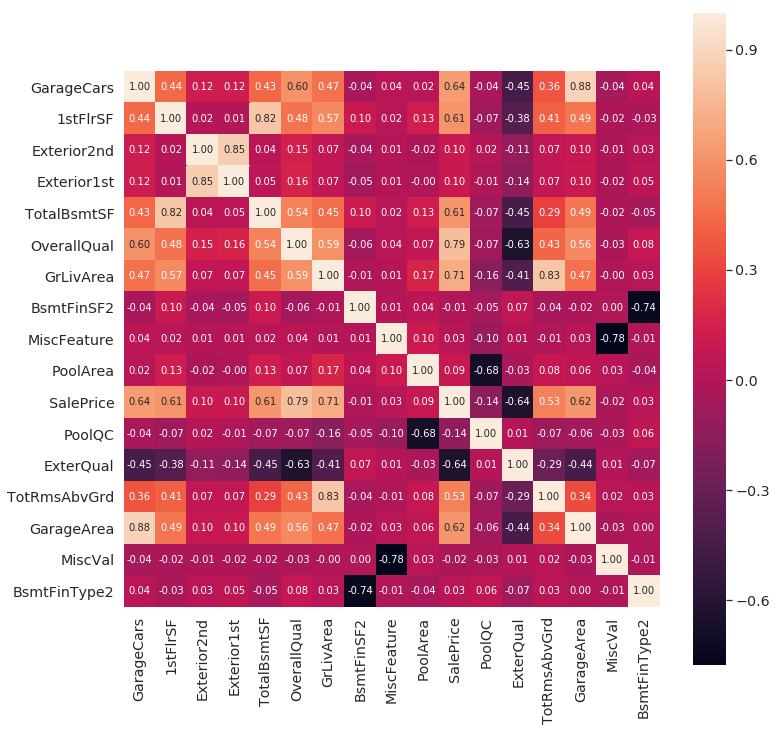

In [0]:
## PLOT HEATMAP MATRIX FOR RELEVANT CORRELATIONS 
# Performed pairwise Pearson correlation analysis on all pairs of these variables

relevant_cols= list(relevant_cols)

interesting_df = train_raw[relevant_cols]

grid = interesting_df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.3)
cm = np.corrcoef(interesting_df.values.T)

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=relevant_cols, xticklabels=relevant_cols, ax =ax)

### From the above plot we find:
1. OverallQual is highly correlated with SalePrice.
2. GarageCars are highly correlated with GarageArea.
3. TotalBsmtSF is highly correlated with 1stFloorSF.
4. GrLivArea is highly correlated with TorRmsAbvGrd.
5. TotalBsmtSF is negatively correlated with Exterior2nd and Exterior1st.
6. In general we can say Exterior2nd and Exterior1st are highly correlated within themselves and negatively correlated to all other variable.

## Part 2 - Informative Plots

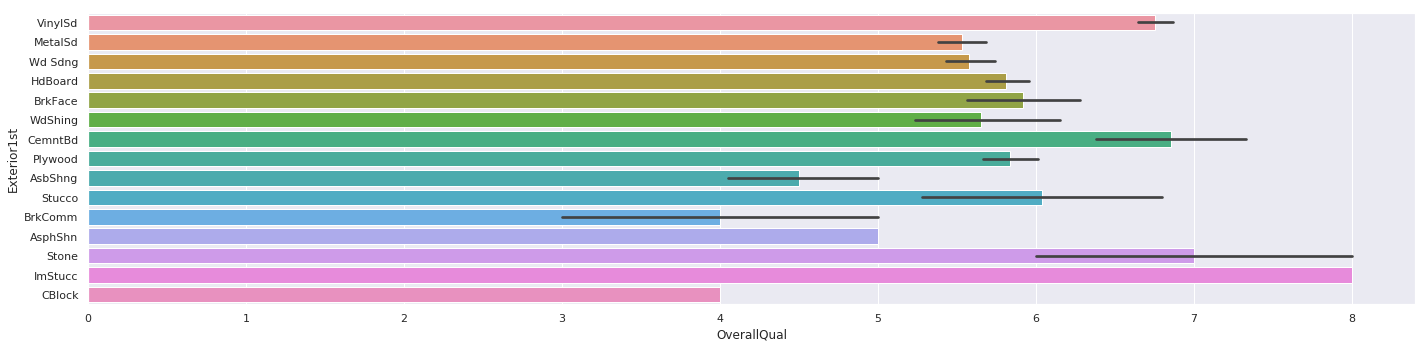

In [0]:
# TODO: code to generate Plot 1

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'OverallQual', y = 'Exterior1st', data = df )
plt.tight_layout()

### What interesting properties does Plot 1 reveal?  
We can see that factor Overall Quality is correlated with Exterior quality and ovarall quality is very high in case of VinylSd and ImStucc. 

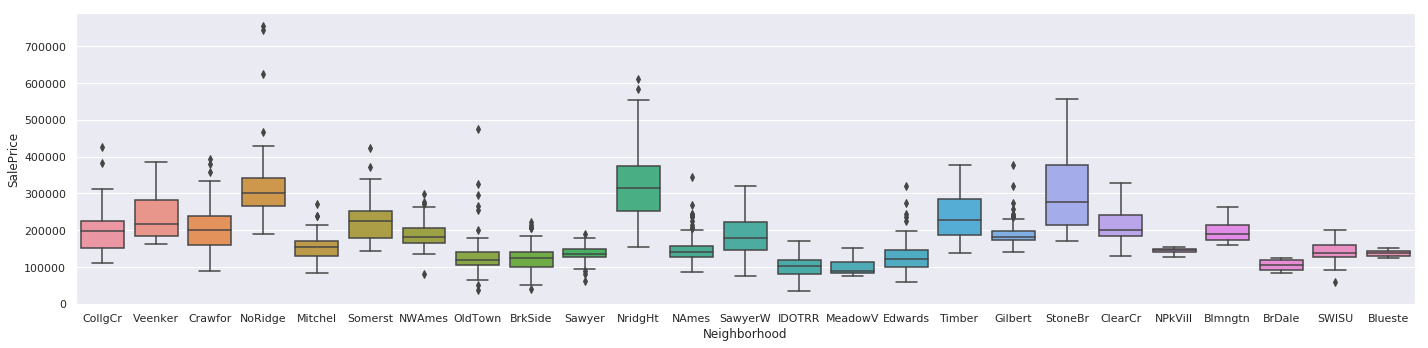

In [0]:
# TODO: code to generate Plot 2

sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(df['Neighborhood'], df['SalePrice'])
plt.tight_layout()

### What interesting properties does Plot 2 reveal?  
This visualization reveals an interesting plot of the relation between the neigbhbourhood of various area for example around NndgHt and StonyBr is usually high.

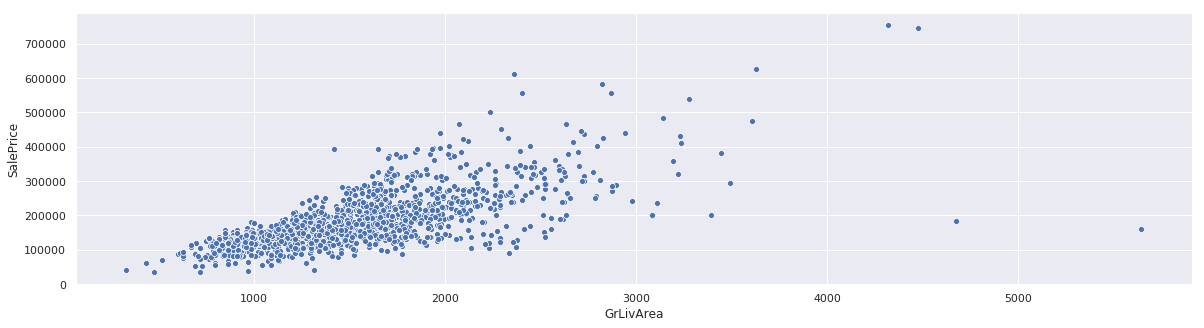

In [0]:
# TODO: code to generate Plot 3

sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df )

### What interesting properties does Plot 3 reveal?

We see SalePrice is heavily clustered around GrLivArea in the range of 1000 and 2000. And the general pattern is as the living area increases price is increased.

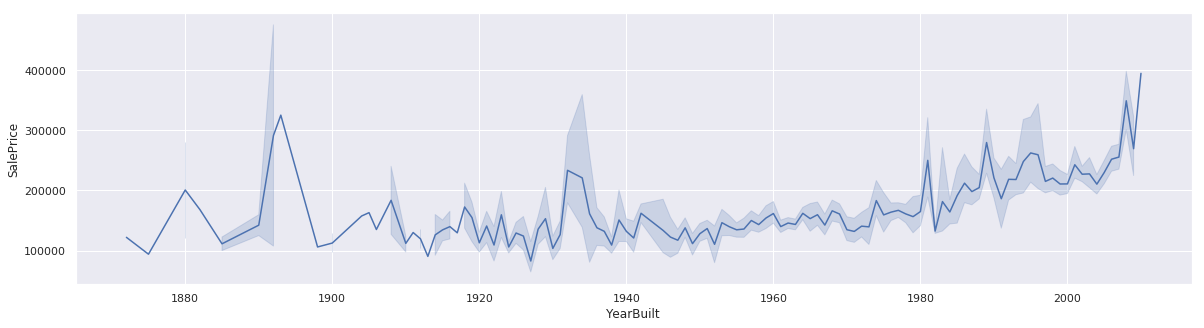

In [0]:
# TODO: code to generate Plot 4

sns.lineplot(x = 'YearBuilt', y = 'SalePrice', data = train_raw )

### What interesting properties does Plot 4 reveal?
This is line plot for SalePrice vs Yearlbuilt. We can notice three peaks around of years - 1890 , 1935 and around 2010. Around the span of these years saleprice increased exponentially. 

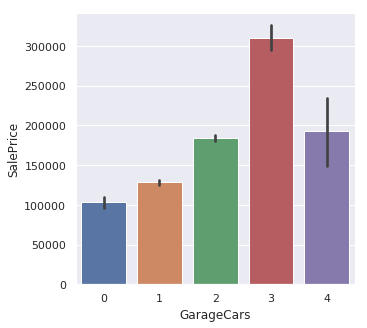

In [0]:
# TODO: code to generate Plot 5 

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'GarageCars', y = 'SalePrice', data = df )

### What interesting properties does Plot 5 reveal?  
It is interesting to note that as the number of Garage Cars increases, Sale Price increases until no. of cars is 3, it is expected that for cars numbers = 3, it price should be yet more, but this is not correct. Highest SalePrice of houses  correspond to cars numbers = 4.

## Part 3 - Handcrafted Scoring Function

In [0]:
"""
For deciding 'desirability' of properties, certain attributes are selected from the entire DataFrame, namely-

1. OverallQual:-   Higher the quality score, property will be desirable.
2. GrLivArea:-     Total living area above ground. Higher the value, property will be more desirable.
3. Exterior1st:-   Represents area owned outside the house. Higher the value, property will be more desirable.
4. BedroomAbvGr:-  Total bedrooms. More rooms, more desirability.
5. GarageCars:-    Total cars the garage can accomodate, if any. Higher the count, more desirable the property.
6. FullBath:-      Desirability can be marked proportional to count of full bathrooms above grade.

SalePrice will be used for calculating correlation of targeted attributes to get relative contribution of every attribute.
"""

## Create a new filtered DataFrame with targetted columns to deduce desirability
target_cols = ['GrLivArea', 'OverallQual', 'Exterior1st', 'BedroomAbvGr', 'FullBath', 'GarageCars']
filtered_df = train_raw[target_cols].copy()

## Normalizing the generated dataframe using min-max normalisation
normalised_target_df = (filtered_df-filtered_df.min())/(filtered_df.max() - filtered_df.min())
normalised_sale_price = (train_raw['SalePrice'] - train_raw['SalePrice'].min())/(train_raw['SalePrice'].max()-train_raw['SalePrice'].min())

## Evaluating correlation of normalised_target_df with SalePrice
sale_price_corr = normalised_target_df.corrwith(normalised_sale_price, method='spearman', axis=0)

## Evaluating score for individual property biased with attribute's correlation with SalePrice
scores = list()
for index, row in normalised_target_df.iterrows():
  score = 0
  for col, val in row.iteritems():
    score+=val*sale_price_corr[col]
  scores.append(score)

## Appending a new DESIRABILITY_RANK column in out filtered DataFrame
filtered_df['Desirability_score'] = pd.Series(scores)
filtered_df['Desirability_rank'] = pd.Series(scores).rank(ascending=False)
sorted_desirability = filtered_df.sort_values(by=['Desirability_rank'])

## Observe distribution of new DataFrame
print("Glimpse of generated DataFrame")
display(sorted_desirability.head())
print("\n\nProperties of this DataFrame")
display(sorted_desirability.describe())

Glimpse of generated DataFrame


,GrLivArea,OverallQual,Exterior1st,BedroomAbvGr,FullBath,GarageCars,Desirability_score,Desirability_rank
1182,4476,10,13,4,3,3,2.714973,1.0
523,4676,10,5,3,3,3,2.674373,2.0
691,4316,10,6,4,3,3,2.658986,3.0
1169,3627,10,6,4,3,3,2.564059,4.0
58,2945,10,12,3,3,3,2.469827,5.0




Properties of this DataFrame


,GrLivArea,OverallQual,Exterior1st,BedroomAbvGr,FullBath,GarageCars,Desirability_score,Desirability_rank
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,6.099315,9.624658,2.866438,1.565068,1.767123,1.389371,730.500000
std,525.480383,1.382997,3.197659,0.815778,0.550916,0.747315,0.371515,421.609883
min,334.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.170932,1.000000
25%,1129.500000,5.000000,8.000000,2.000000,1.000000,1.000000,1.086033,365.750000
50%,1464.000000,6.000000,12.000000,3.000000,2.000000,2.000000,1.422508,730.250000
75%,1776.750000,7.000000,12.000000,3.000000,2.000000,2.000000,1.640137,1095.250000
max,5642.000000,10.000000,14.000000,8.000000,3.000000,4.000000,2.714973,1460.000000


### What are the ten most desirable houses?

In [0]:
display(sorted_desirability.head(10))

,GrLivArea,OverallQual,Exterior1st,BedroomAbvGr,FullBath,GarageCars,Desirability_score,Desirability_rank
1182,4476,10,13,4,3,3,2.714973,1.0
523,4676,10,5,3,3,3,2.674373,2.0
691,4316,10,6,4,3,3,2.658986,3.0
1169,3627,10,6,4,3,3,2.564059,4.0
58,2945,10,12,3,3,3,2.469827,5.0
1298,5642,10,11,3,2,2,2.451894,6.0
798,3140,9,12,4,3,3,2.436076,7.0
803,2822,9,12,4,3,3,2.392263,8.0
1268,3447,8,11,4,3,3,2.383543,9.0
185,3608,10,13,4,2,3,2.383399,10.0


### What are the ten least desirable houses?

In [0]:
display(sorted_desirability.tail(10))

,GrLivArea,OverallQual,Exterior1st,BedroomAbvGr,FullBath,GarageCars,Desirability_score,Desirability_rank
1326,774,3,8,3,1,0,0.579451,1451.0
620,864,3,11,2,1,0,0.577034,1452.0
614,630,4,5,1,1,0,0.576318,1454.0
434,630,4,5,1,1,0,0.576318,1454.0
649,630,4,5,1,1,0,0.576318,1454.0
710,729,3,12,2,1,0,0.563283,1456.0
636,800,2,0,1,1,0,0.395533,1457.0
916,480,2,0,1,0,1,0.312137,1458.0
533,334,1,12,1,1,0,0.299537,1459.0
375,904,1,13,1,0,0,0.170932,1460.0


### Describe your scoring function and how well you think it worked.
From the above ranked and filtered properties based on calculated desirability, it can be observed that **```Desirability_rank``` is not biased on any specific independent attributes but on a set of attribute values**. <br/>
If value of few parameters are high but majority of attributes have relatively lower value, ```desirability_score``` gets scaled and hence ranked accordingly.

## Part 4 - Pairwise Distance Function

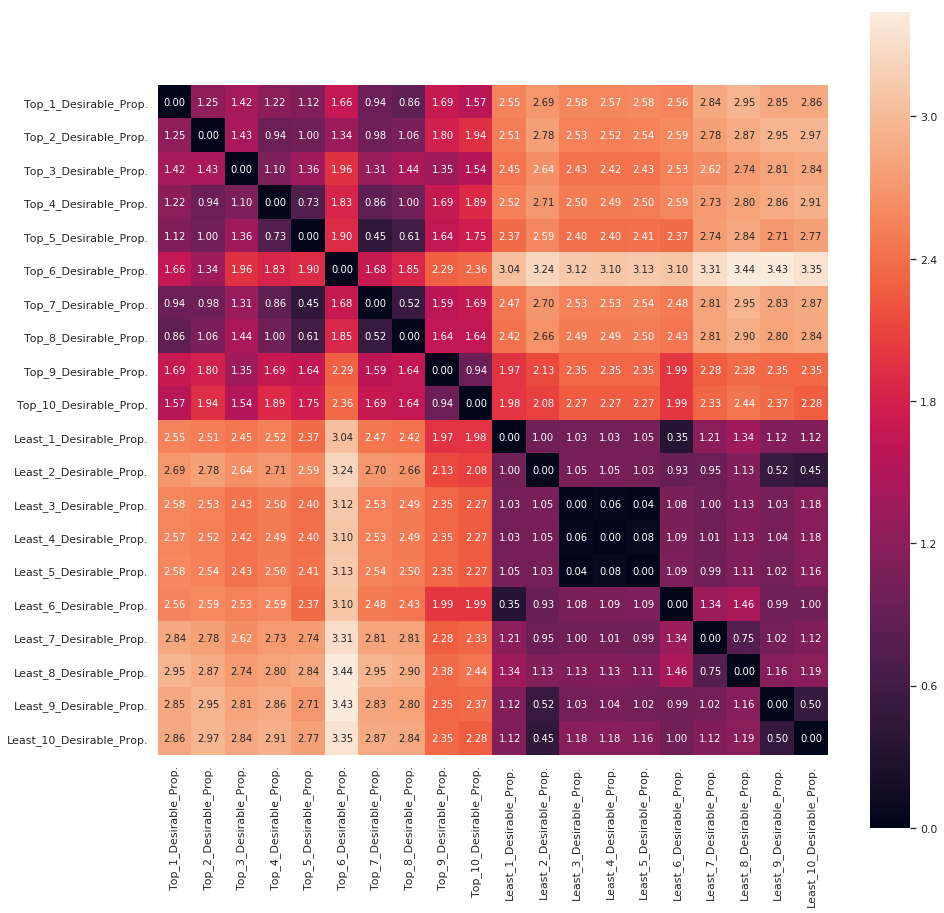

In [0]:
"""
For evaluating pairwise similarity between individual properties,
15 highly correlated variables with few imputed categorical variables are selected.
"""

selected_cols = list(top_cor_cols.values) + ['Exterior1st', 'RoofStyle', 'HouseStyle']

def pairwise_dist(properties):
  """
  properties (function-argument) contains list of rows which represent an instance of real data.
  From pre-imputed DataFrame, the selected columns are filtered. Since range of each atribute is different,
  sklearn.preprocessing.MinMaxScaler is used to scale each attribute.
  The resulting scaled DataFrame is used to compute pairwise eucledian distance with individual property.
  the resulting matrix (due to pairwise-distances) is returned to the caller.
  """
  metrics = properties[selected_cols].copy()       # Filtered DataFrame with selected columns
  scaler = MinMaxScaler()                          # sklearn.preprocessing.StandardScaler() object
  scaled_metrics = scaler.fit_transform(metrics)   # Filtered instances are scaled
  scaled_metrics = pd.DataFrame(scaled_metrics, index=metrics.index, columns=metrics.columns)
  
  return euclidean_distances(scaled_metrics)

"""
For testing the validity of our testing function, we will try to find the distances of
Top 10 desirable properties and Least 10 desirable properties. If the function works correctly,
then all the top and least properties should have similar distance traits.
"""

top_10_ids = sorted_desirability.head(10).index.values
least_10_ids = sorted_desirability.tail(10).index.values
test_ids = np.hstack((top_10_ids, least_10_ids))
titles = ['Top_'+str(i+1)+'_Desirable_Prop.' for i in range(10)]
titles += ['Least_'+str(i+1)+'_Desirable_Prop.' for i in range(10)]
test_properties = train_raw.iloc[test_ids].copy()
smp = pairwise_dist(test_properties)

plt.figure(figsize=(15,15))
sns.heatmap(smp, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=titles, xticklabels=titles)
plt.show()

### How well does the distance function work? When does it do well/badly?
The above heatmap reflects that all the top desirable properties and least desirable properties have similar distances. Hence the designed pairwise distance function works fine.

## Part 5 - Clustering

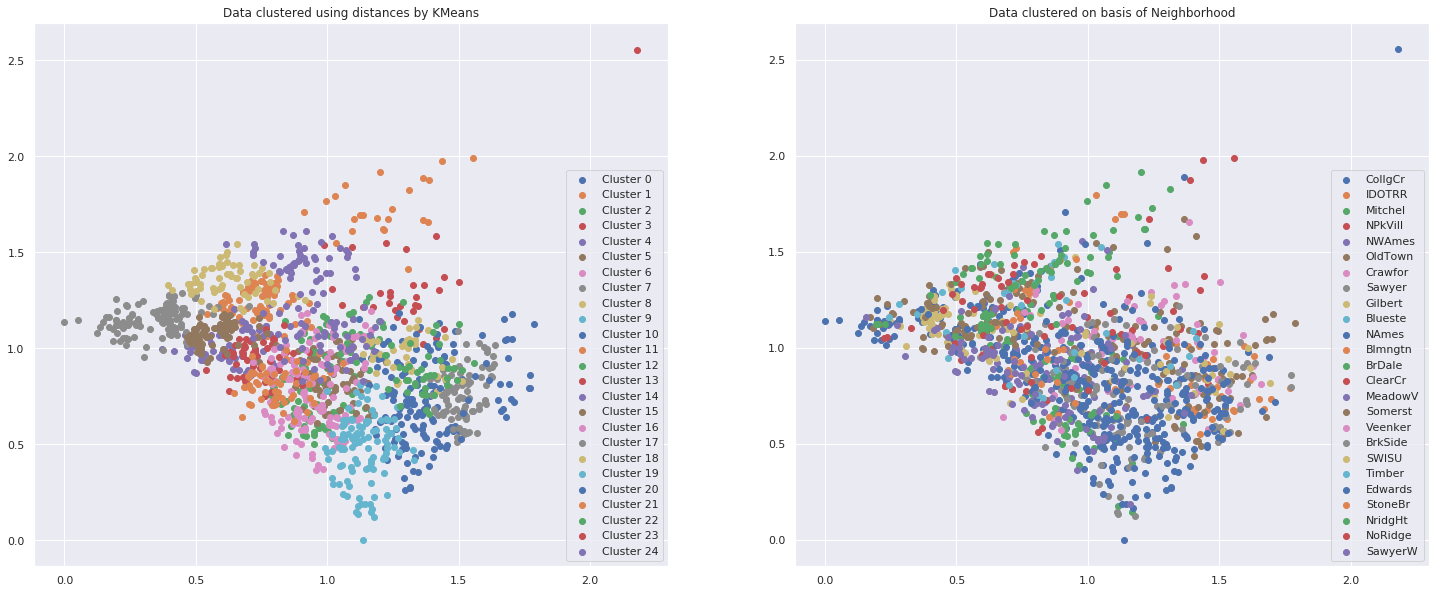

In [0]:
"""
Clusters will be created based on the pairwise distances of every instance in given data.
For this question, KMeans clustering will be used and the resulting clusters
will be validated against the "Neighbourhood" attribute of given data. This validation
may imply that each neighbourhood has similar types of constructions and hence closer distances.
"""

distances = pairwise_dist(train_raw)
no_clusters = len(train_raw['Neighborhood'].value_counts())
kmeans = KMeans(n_clusters=no_clusters).fit(distances)

cluster_points = kmeans.predict(distances)
cluster_centers = kmeans.cluster_centers_

distance_df = pd.DataFrame(distances, index=train_raw.index, columns=train_raw.index)
distance_df["clusters"] = pd.Series(cluster_points)
distance_df["Neighborhood"] = df["Neighborhood"].copy()

f1 = plt.figure(figsize=(25,10))
f1.add_subplot(1,2,1)
for i in range(len(cluster_centers)):
  dists = distance_df.loc[distance_df["clusters"]==i]
  dists = dists.drop(["clusters", "Neighborhood"], axis=1)
  dists = dists.values
  plt.scatter(dists[:,0], dists[:,-1], label="Cluster {}".format(i))
plt.title("Data clustered using distances by KMeans")
plt.legend()

f1.add_subplot(1,2,2)
for i in set(df["Neighborhood"].value_counts().index):
  dists = distance_df.loc[distance_df["Neighborhood"]==i]
  dists = dists.drop(["clusters", "Neighborhood"], axis=1)
  dists = dists.values
  plt.scatter(dists[:,0], dists[:,-1], label=i)
plt.title("Data clustered on basis of Neighborhood")
plt.legend()

plt.show()
  

### How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

## Observing the clusters and Neighbourhood boundaries
First plot (left-side) represents the clusters predicted using KMeans clustering algorithm by training it with pairwise distances of each instance. The second plot (right-side) represents the neighbourhood boundaries for each instance.
<br/>
It can be observed that **the group of similar houses/properties do not imply they belong to the same neighbourhood.** Different range of properties may exist in any neighbourhood and hence the plotted clusters and neighbourhood boundaries do not overlap.

## Part 6 - Linear Regression

In [0]:
# TODO: code for linear regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

top_cor_cols = heatmap_matrix.nlargest(15, 'SalePrice')['SalePrice'].index
y_trainR = train_raw['SalePrice'][0:1000].copy()

X_trainR = train_raw[top_cor_cols][0:1000].copy()
X_trainR.drop('SalePrice', axis = 1, inplace = True)

X_trainR = X_trainR.values
y_trainR = y_trainR.values

X_testR =  train_raw[top_cor_cols][1001:].copy()
X_testR.drop('SalePrice', axis = 1, inplace = True)

y_testR = train_raw['SalePrice'][1001:].copy()

X_testR = X_testR.values
y_testR = y_testR.values


model = Pipeline([('linear', LinearRegression(fit_intercept=False))])
clf = model.fit(X_trainR, y_trainR)

print("Accuracy:", clf.score(X_testR, y_testR))

coefficients = clf.named_steps['linear'].coef_
cols_ = top_cor_cols.to_list()
enums = zip(coefficients, cols_)
enums = sorted(enums, key=lambda x:-np.abs(x[0]))
importances = " + ".join("%s * %s" % (round(c,3), n) for c, n in enums)
print(importances)

Accuracy: 0.6722515573794974
21672.562 * SalePrice + 6535.0 * GarageYrBlt + 4180.128 * 1stFlrSF + 3371.898 * GrLivArea + 1642.148 * FullBath + -82.063 * MasVnrArea + 44.771 * GarageCars + 39.935 * OverallQual + 28.227 * YearRemodAdd + 24.497 * GarageArea + 24.194 * Fireplaces + 18.002 * TotRmsAbvGrd + 12.568 * YearBuilt + 2.617 * TotalBsmtSF


### How well/badly does it work? Which are the most important variables?
First 1000 rows were selected out for scaling and rest 460 rows were sent for testing our Linear Regression Model. It produced and accuracy score of 0.675 which is not a very high score and therefore the linear model is not performing very well in this case. It might be because of the choice of highly correlated variables.  
Secondly, from the score coefficients we can see GarageYrBlt and 1FlrSF are the most important variables in prediction.


## Part 7 - External Dataset

Compareing Sale prices in both datasets


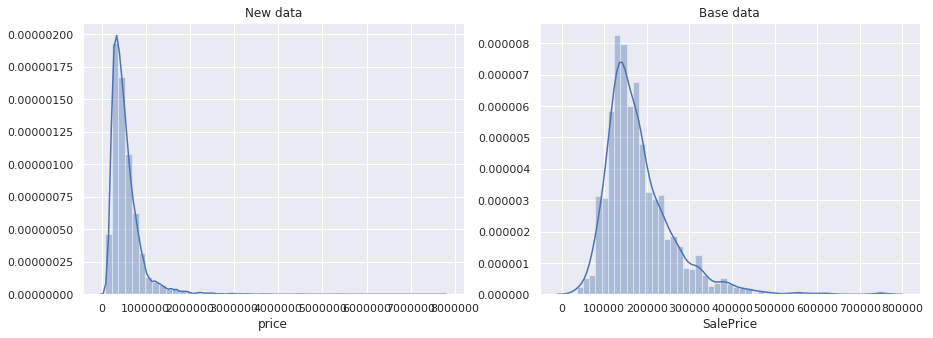



Compareing Living area in both datasets


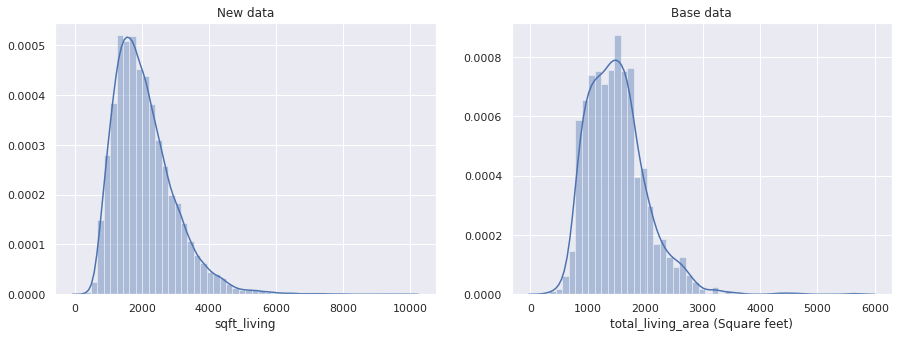



Compareing Bedroom count in both datasets


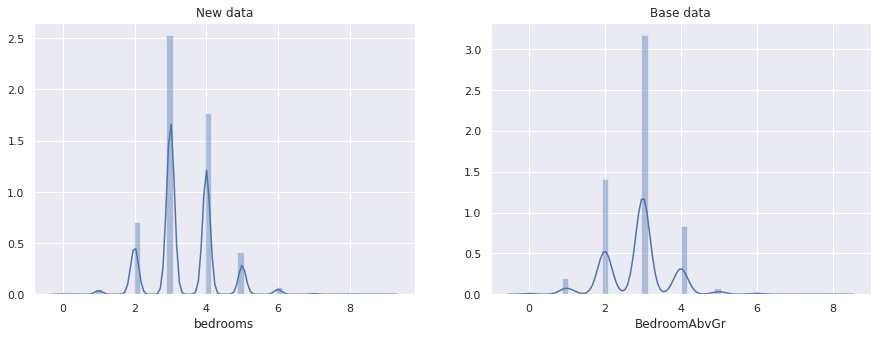



Compareing Bathroom Count in both datasets


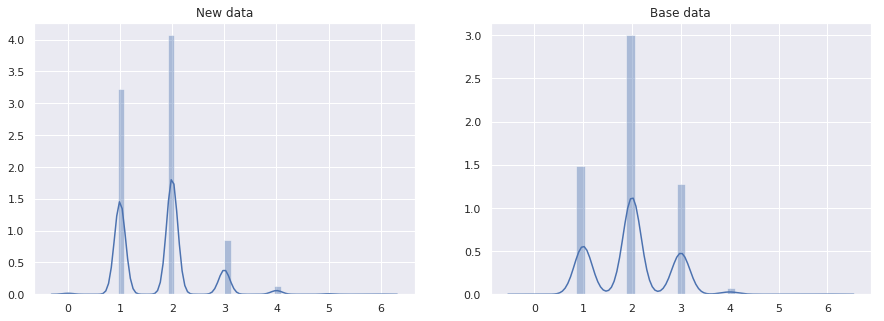



Compareing normalised Overall quality score in both datasets


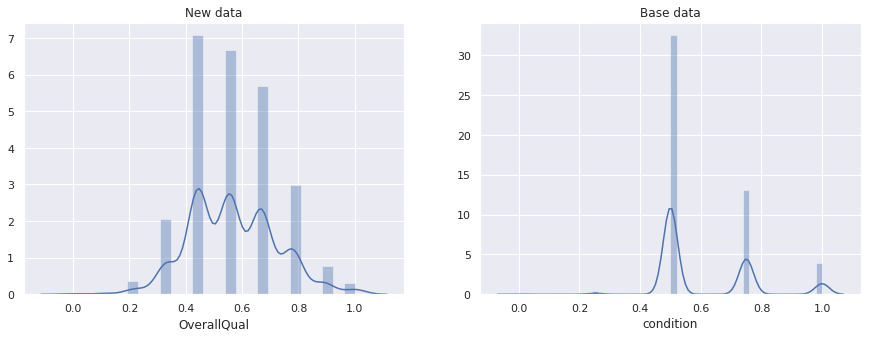

In [0]:
# TODO: code to import external dataset and test

"""
Similar to Ames Housing price prediction dataset, there exists a similar dataset
of Housing prices of King County, USA. On close observatios, some attributes had
were similar to the ones given in problem dataset.
Following code attempts to analyse the individual attributes and possibility to
merge them in our existing dataset.
"""

new_data = pd.read_csv("kc_house_data.csv")
new_data_cols = new_data.columns

print("Compareing Sale prices in both datasets")
f1 = plt.figure(figsize=(15,5))
f1.add_subplot(1,2,1)
plt.title("New data")
sns.distplot(new_data['price'])
f1.add_subplot(1,2,2)
plt.title("Base data")
sns.distplot(train_raw['SalePrice'])
plt.show()

print("\n\nCompareing Living area in both datasets")
liv = new_data['sqft_living'].loc[new_data['sqft_living']<10000]
total_area = train_raw['2ndFlrSF'].values + train_raw['1stFlrSF'].values
f1 = plt.figure(figsize=(15,5))
f1.add_subplot(1,2,1)
sns.distplot(liv)
plt.title("New data")
f1.add_subplot(1,2,2)
sns.distplot(total_area)
plt.xlabel('total_living_area (Square feet)')
plt.title("Base data")
plt.show()

print("\n\nCompareing Bedroom count in both datasets")
new_bedrooms = new_data['bedrooms'].loc[new_data['bedrooms']<10]
f1 = plt.figure(figsize=(15,5))
f1.add_subplot(1,2,1)
plt.title("New data")
sns.distplot(new_bedrooms)
f1.add_subplot(1,2,2)
plt.title("Base data")
sns.distplot(train_raw['BedroomAbvGr'])
plt.show()

print("\n\nCompareing Bathroom Count in both datasets")
new_bathrooms = np.floor(new_data['bathrooms'].loc[new_data['bathrooms']<7].values)
old_bathrooms = train_raw['FullBath'] + train_raw['BsmtFullBath']
f1 = plt.figure(figsize=(15,5))
f1.add_subplot(1,2,1)
plt.title("New data")
sns.distplot(new_bathrooms)
f1.add_subplot(1,2,2)
plt.title("Base data")
sns.distplot(old_bathrooms)
plt.show()

print("\n\nCompareing normalised Overall quality score in both datasets")
old_qual = (train_raw['OverallQual']-train_raw['OverallQual'].min())/(train_raw['OverallQual'].max()-train_raw['OverallQual'].min())
new_qual = (new_data['condition']-new_data['condition'].min())/(new_data['condition'].max()-new_data['condition'].min())
f1 = plt.figure(figsize=(15,5))
f1.add_subplot(1,2,1)
plt.title("New data")
sns.distplot(old_qual)
f1.add_subplot(1,2,2)
plt.title("Base data")
sns.distplot(new_qual)
plt.show()

### Describe the dataset and whether this data helps with prediction.
1. Upon manaually matching each feature present in **"House Sales in King County, USA"** - https://www.kaggle.com/harlfoxem/housesalesprediction with the train.csv of House Price Prediction Challenge, we find that features pair like SalePrice, Bathroom count,  OverQual-condition, Bedroom-count and living area show very similar variations in both the datasets.

2. However, merging both the dataset will result in substantial loss of information from our dataset because there are effectively only 5 matching attributes in both and we cannot therefore expect effective predictions in our scenario.


## Part 8 - Permutation Test

In [0]:
# TODO: code for all permutation tests

In [0]:
# Single-variable regression model
features = ['GrLivArea', 'TotalBsmtSF','KitchenQual','YearBuilt', 'GarageArea', 'YrSold', 'FullBath', 'LotShape','BsmtCond', 'LotFrontage']
y = train_raw['SalePrice']
y = y.values
for feature in features:
  X = train_raw[feature]
  X = X.values
  X = X.reshape(-1, 1)
  clf = LinearRegression()
  clf.fit(X,y)

  # permutation test to determine a p-value
  score, permutation_score, p_value = permutation_test_score(clf, X, y, scoring="neg_mean_squared_error", cv=2, n_permutations=100)
  pred = np.log(clf.predict(X))
  score = np.sqrt(mean_squared_error(pred,np.log(y)))

  print(str(feature) + "\tScore\t %s \t(pvalue : %s)" % (score, p_value))

GrLivArea	Score	 0.27557677046374385 	(pvalue : 0.009900990099009901)
TotalBsmtSF	Score	 0.3237763176082348 	(pvalue : 0.009900990099009901)
KitchenQual	Score	 0.3382828064530211 	(pvalue : 0.009900990099009901)
YearBuilt	Score	 0.3447245451304556 	(pvalue : 0.009900990099009901)
GarageArea	Score	 0.31593571189759184 	(pvalue : 0.009900990099009901)
YrSold	Score	 0.4073180197737116 	(pvalue : 0.9504950495049505)
FullBath	Score	 0.3319275971697491 	(pvalue : 0.009900990099009901)
LotShape	Score	 0.3908596336087982 	(pvalue : 0.009900990099009901)
BsmtCond	Score	 0.40653382450431114 	(pvalue : 0.33663366336633666)
LotFrontage	Score	 0.38041544236179087 	(pvalue : 0.009900990099009901)


For the variables chosen above, the p-value is very low, <0.001 , which means that these variables are very important for prediction in our model and inclusion of these variables will make our model accurate. On the other hand variables like YrSold and BsmtCond have high p-value indicating strong evidence against the null hypothesis.

In [0]:
## PREDICTION MODEL 

new_features = heatmap_matrix.index.to_list()
new_features.remove('SalePrice')
# print(train_raw['SalePrice'])
y = train_raw['SalePrice']
X_train = train_raw[new_features]
# print(X_train.shape, y.shape)
GBR2 = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR2.fit(X_train, y)
print(GBR2.score(X_train, y))
X_test = test_raw[new_features].values
y_predict2 = np.exp(GBR2.predict(X_test))
# print(y_predict2)

sample_submission['SalePrice'] = pd.Series(y_predict2)
sample_submission['Id'] = pd.Series(Id_test)
final_csv = sample_submission.to_csv('final_result_house.csv', index=False)

0.9810026297064295


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


In [0]:
!ls
def download_file(file_name='final_result_house.csv'):
    files.download(file_name)

download_file(file_name='final_result_house.csv')

In [0]:
# top_cor_cols = heatmap_matrix.nlargest(15, 'SalePrice')['SalePrice'].index
# GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
# parameters = { 'learning_rate':[0.01, 0.1], 'n_estimators':[50, 100], 'max_depth':[3, 5]}
# GBR = GridSearchCV(GBR, parameters, cv=5)
# GBR.fit(X, y)
# print(GBR.score(X, y))
# top_cor_cols = top_cor_cols.tolist()
# top_cor_cols.remove('SalePrice')
# X_test = test_raw[top_cor_cols].values
# y_predict = GBR.predict(X_test)
# sample_submission['SalePrice'] = pd.Series(y_predict)
# sample_submission['Id'] = pd.Series(Id_test)
# final_csv = sample_submission.to_csv('final_result_house.csv', index=False)

Describe the results.

## Part 9 - Final Result

In [0]:
## PREDICTION MODEL 

new_features = heatmap_matrix.index.to_list()
new_features.remove('SalePrice')

y = train_raw['SalePrice']
X_train = train_raw[new_features]
print(X_train.shape, y.shape)
GBR2 = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR2.fit(X_train, y)
print(GBR2.score(X_train, y))
X_test = test_raw[new_features].values
y_predict2 = np.exp(GBR2.predict(X_test))

sample_submission['SalePrice'] = pd.Series(y_predict2)
sample_submission['Id'] = pd.Series(Id_test)
final_csv = sample_submission.to_csv('final_result_house.csv', index=False)

(1460, 79) (1460,)
0.9810026297064295


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/yashasingh

Highest Rank: 2109

Score: 0.133

Number of entries: 5


INCLUDE IMAGE OF YOUR KAGGLE RANKING

### References

1. https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas 
2. https://nycdatascience.com/blog/student-works/housing-price-predictions-using-advanced-regression-techniques/ 